In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [4]:
data.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
data = data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [8]:
corrMatrix = data.corr()
corrMatrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876577,-0.569899,0.314831,0.126230,0.185692,0.063068,0.219195,0.581159
Age_08_04,-0.876577,1.000000,0.505603,-0.156415,-0.097931,-0.148688,-0.005327,-0.198427,-0.470207
KM,-0.569899,0.505603,1.000000,-0.333100,0.103144,-0.036867,0.015117,0.278279,-0.028396
HP,0.314831,-0.156415,-0.333100,1.000000,0.035404,0.093225,0.209456,-0.298581,0.089412
cc,0.126230,-0.097931,0.103144,0.035404,1.000000,0.080406,0.014568,0.307018,0.335549
Doors,0.185692,-0.148688,-0.036867,0.093225,0.080406,1.000000,-0.160101,0.109439,0.302973
Gears,0.063068,-0.005327,0.015117,0.209456,0.014568,-0.160101,1.000000,-0.005457,0.020582
Quarterly_Tax,0.219195,-0.198427,0.278279,-0.298581,0.307018,0.109439,-0.005457,1.000000,0.626146
Weight,0.581159,-0.470207,-0.028396,0.089412,0.335549,0.302973,0.020582,0.626146,1.000000


<AxesSubplot:>

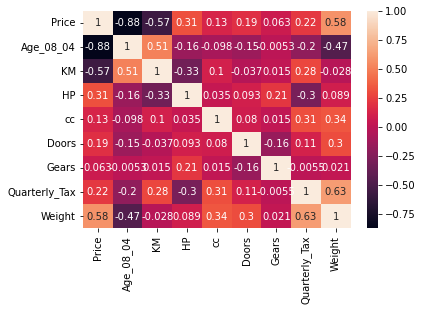

In [9]:
sns.heatmap(corrMatrix, annot=True)

## scatter plot 

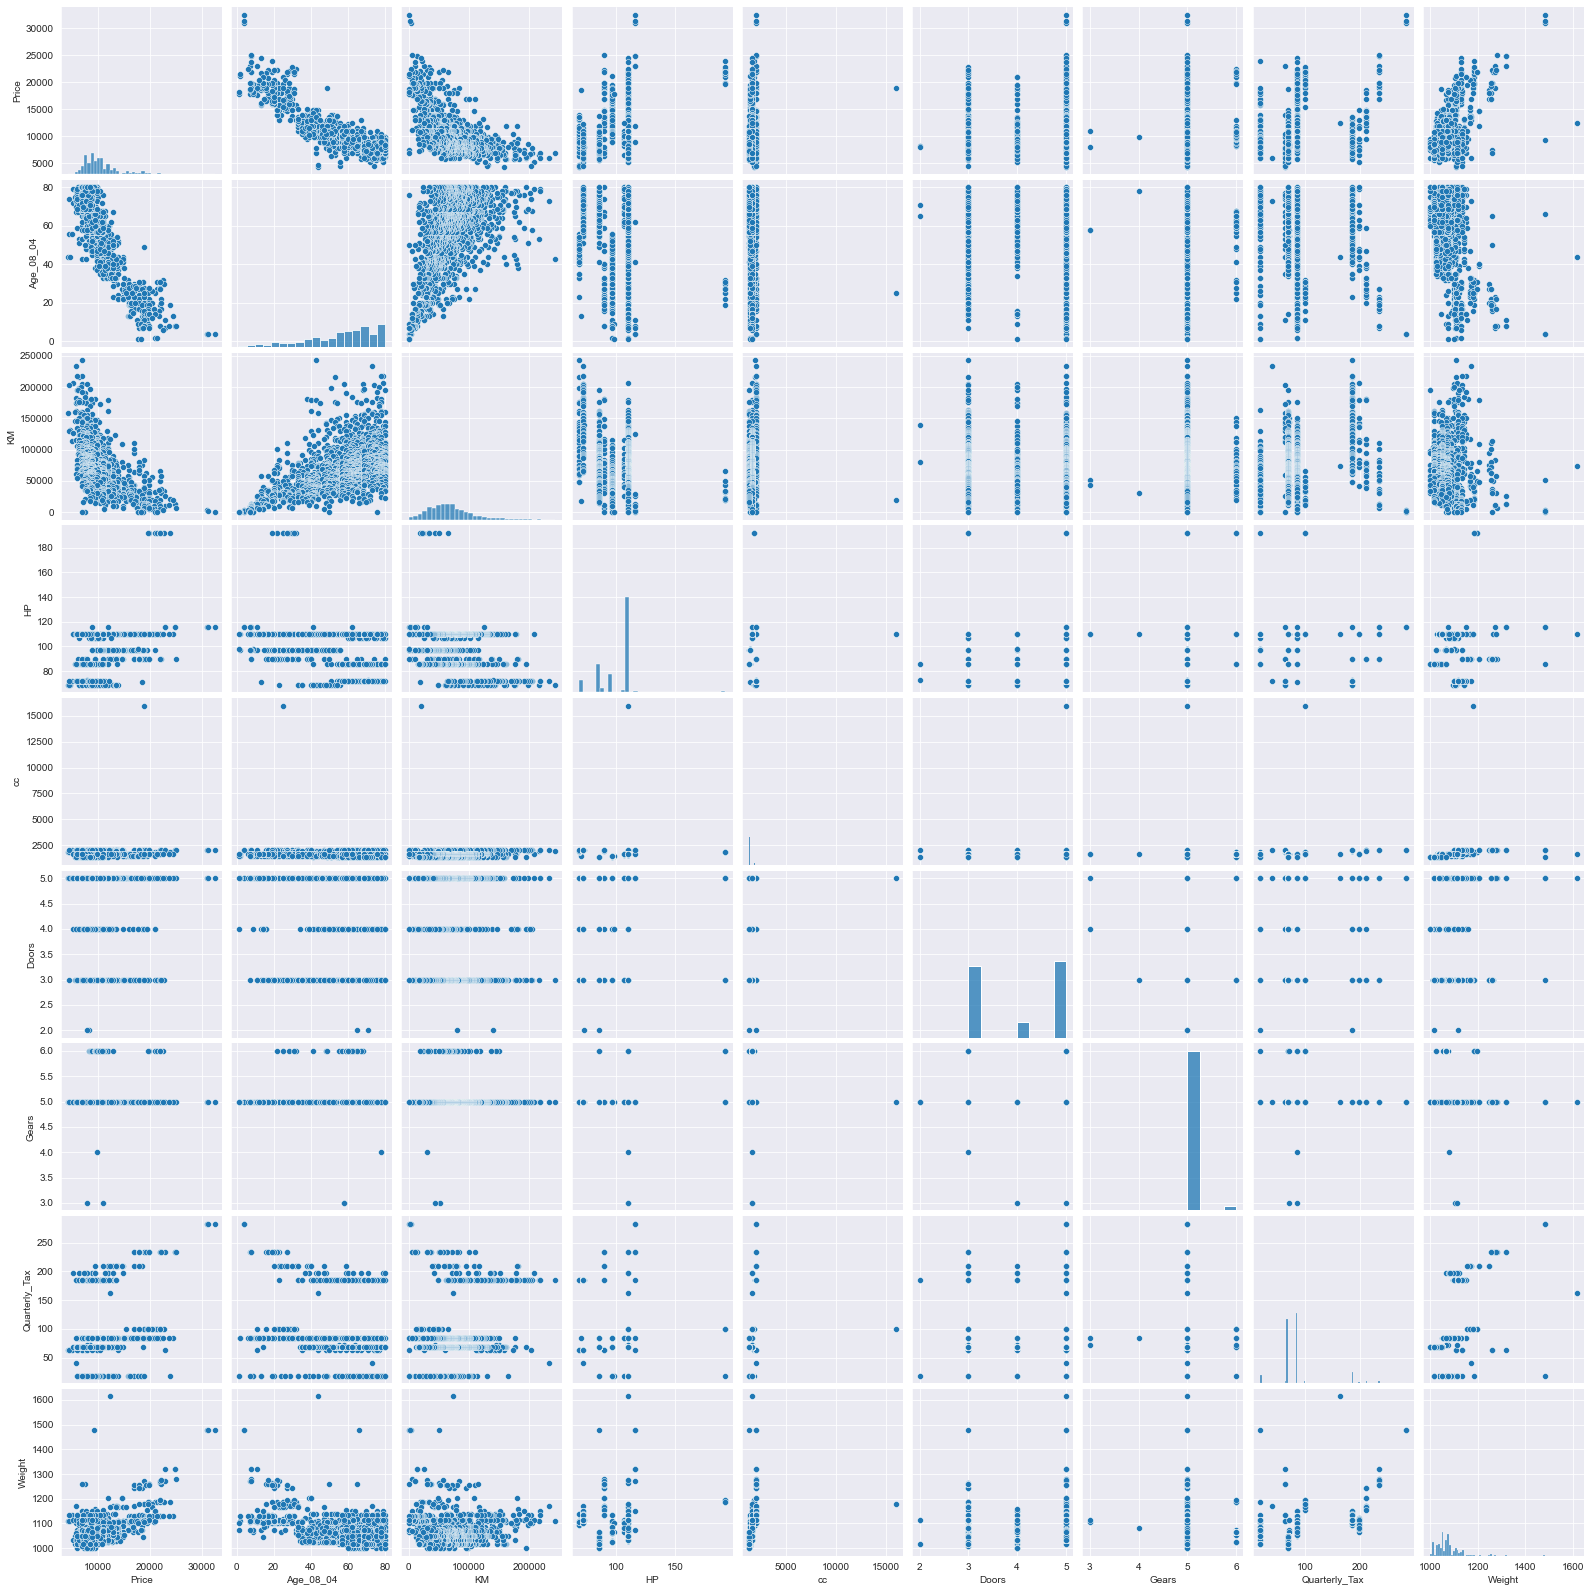

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

## Regression Model 

In [12]:
X = data[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Y = data[['Price']]

In [18]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.246e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:17:18   Log-Likelihood:                         -12375.
No. Observations:                1435   AIC:                                  2.477e+04
Df Residuals:                    1427   BIC:                                  2.481e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4401      2.446    -51.286      0.000    -130.238    -120.642
KM               -0.0205      0.001    -16.311      0.000      -0.023      -0.018
HP               33.5162      2.797     11.983      0.000      28.029      39.003
cc               -0.1023      0.090     -1.131      0.258      -0.280       0.075
Doors            -8.0860     40.214     -0.201      0.841     -86.970      70.798
Gears            77.2926    148.299      0.521      0.602    -213.614     368.199
Quarterly_Tax     5.8337      1.227      4.753      0.000       3.426       8.241
Weight           14.0343      0.773     18.156      0.000      12.518      15.551
==============================================================================
Omnibus:                      108.492   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.686
Skew:                           0.019   Prob(JB):                    1.07e-122
Kurtosis:                       6.065   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multicollinearity

## Finding Cook's Distance

In [19]:
infl = model.get_influence()

In [20]:
summ_df = infl.summary_frame()

In [21]:
summ_df.sort_values('cooks_d', ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.286340,-2.365703e+00,-2.766014,2.610403e+01,0.630986,0.899008,-4.270372,-3.602505,8.213351e+01,7.654950,0.918121,25.633339,7.814394,26.167253
221,-0.255040,-2.598858e-02,0.174256,4.177610e-01,0.553528,1.572046,0.558785,-1.689801,3.718873e-01,-6.153316,0.072851,-1.724847,-6.234426,-1.747583
959,-0.208558,3.740157e-02,0.443497,1.976532e-01,0.539293,0.995489,0.788462,-1.263781,2.082462e-01,-4.103700,0.090022,-1.290725,-4.126685,-1.297954
109,0.104613,-2.934976e-01,0.114830,-1.898588e-01,-0.220389,-0.606351,0.332129,0.558429,1.225199e-01,4.949961,0.038464,0.990030,4.991262,0.998291
601,-0.213159,3.187894e-01,0.384760,-1.108770e-01,0.404486,0.551226,0.429528,-0.747951,9.677894e-02,-5.594547,0.024140,-0.879904,-5.654946,-0.889404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,-0.000061,-4.857156e-05,0.000125,5.781831e-05,0.000118,-0.000047,0.000073,-0.000035,1.203991e-08,-0.006005,0.002664,-0.000310,-0.006003,-0.000310
1432,-0.000140,1.903240e-04,0.000106,1.239877e-05,0.000053,-0.000038,-0.000026,-0.000012,7.368346e-09,-0.003028,0.006388,-0.000243,-0.003027,-0.000243
482,-0.000005,-9.700406e-08,-0.000075,3.540334e-07,-0.000144,0.000011,-0.000023,0.000041,6.561048e-09,-0.005679,0.001625,-0.000229,-0.005677,-0.000229
397,-0.000013,3.417868e-05,0.000024,1.167110e-06,-0.000084,-0.000029,0.000107,0.000022,4.843261e-09,0.002085,0.008830,0.000197,0.002085,0.000197


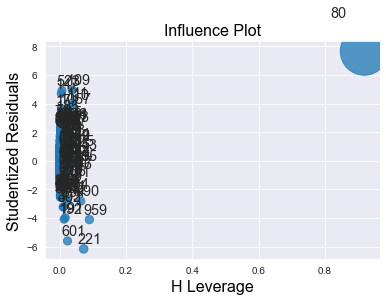

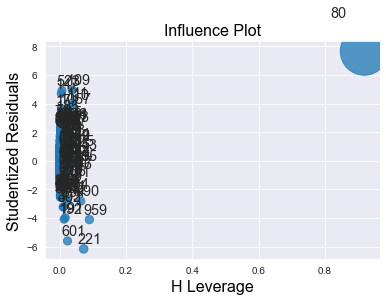

In [22]:

infl.plot_influence()

## Finding Variance Inflation Factor (VIF)

In [24]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,16.4,Age_08_04
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.4,Gears
6,11.0,Quarterly_Tax
7,542.8,Weight


In [26]:
# Removed Weight fron the dataframe and Tested the model
new_X = data[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]

In [27]:
new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.154e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:20:39   Log-Likelihood:                         -12524.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.510e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0542      2.682    -49.228      0.000    -137.316    -126.792
KM               -0.0208      0.001    -14.951      0.000      -0.024      -0.018
HP               44.5098      3.029     14.696      0.000      38.569      50.451
cc                0.1813      0.099      1.834      0.067      -0.013       0.375
Doors           271.8348     41.193      6.599      0.000     191.029     352.641
Gears          2417.2721     81.362     29.710      0.000    2257.671    2576.874
Quarterly_Tax    17.0253      1.177     14.464      0.000      14.716      19.334
==============================================================================
Omnibus:                      184.743   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.967
Skew:                           0.641   Prob(JB):                    4.24e-127
Kurtosis:                       5.845   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model

In [29]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_data= data.drop(data.index[80])

In [30]:
new_X = new_data[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
new_Y = new_data[['Price']]

In [31]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [32]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.151e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:21:48   Log-Likelihood:                         -12516.
No. Observations:                1434   AIC:                                  2.505e+04
Df Residuals:                    1427   BIC:                                  2.508e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0080      2.684    -49.178      0.000    -137.274    -126.742
KM               -0.0210      0.001    -14.587      0.000      -0.024      -0.018
HP               43.7614      3.288     13.309      0.000      37.311      50.212
cc                0.3552      0.313      1.134      0.257      -0.259       0.970
Doors           269.5584     41.386      6.513      0.000     188.375     350.742
Gears          2392.2969     91.890     26.034      0.000    2212.044    2572.550
Quarterly_Tax    16.4623      1.520     10.828      0.000      13.480      19.445
==============================================================================
Omnibus:                      183.779   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.615
Skew:                           0.637   Prob(JB):                    8.34e-127
Kurtosis:                       5.845   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5 - Output Interpretation
1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == -132.01
Thus if the value of x increased by 1, the predicted value of Price will decrease by 132.01

3 - Adj. R-sqared == 0.983
Thus the model explains 98.3% of the variance in dependent variable

##  Preparing model

In [ ]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()

In [ ]:
model.rsquared

In [ ]:
model.summary()

In [ ]:
#Coefficients
model.params

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

## Correlation Matrix